# 3D-BPP

## Pre-requisites

In [1]:
import os
from collections import namedtuple
from time import time

import numpy as np
import pandas as pd
import seaborn as sns
from ortools.sat.python import cp_model
from matplotlib import pyplot as plt
from tqdm import tqdm

from src import config, dataset, main, utils, bins

In [2]:
%matplotlib notebook
%load_ext autoreload
%load_ext nb_black
%autoreload 2

<IPython.core.display.Javascript object>

In [3]:
plt.style.use("seaborn")
np.random.seed(config.RANDOM_SEED)

<IPython.core.display.Javascript object>

## Pallets and containers

Pallet EUR:

|       |  $L\times W\times H (cm)$   | Load (kg)  |
|:-----:|:--------------------------:|:--------:|
| EUR 1 |  $80\times 120\times 14.5$ |  $2490$  |
| EUR 2 | $120\times 100\times 14.4$ |  $1470$  |
| EUR 3 | $100\times 120\times 14.4$ |  $1920$  |
| EUR 6 |  $80\times 60\times 14.4$  |   $500$  |

Container ISO:

|   |  $L\times W\times H (cm)$  | Load (kg) |
|:-:|:--------------------------:|:--------:|
| 1A | $233\times 1200\times 220$ |  $26480$ |
| 1C |  $233\times 587\times 220$ |  $28180$ |

## Dataset

### Products

In [4]:
product_dataset = dataset.ProductDataset(
    "data/products.pkl",
    config.NUM_PRODUCTS,
    config.MIN_PRODUCT_WIDTH,
    config.MAX_PRODUCT_WIDTH,
    config.MIN_PRODUCT_DEPTH,
    config.MAX_PRODUCT_DEPTH,
    config.MIN_PRODUCT_HEIGHT,
    config.MAX_PRODUCT_HEIGHT,
    config.MIN_PRODUCT_WEIGHT,
    config.MAX_PRODUCT_WEIGHT,
    force_overload=False,
)
product_dataset.products.head()

width  depth  height  weight    volume
0    160    280     233       8  10438400
1    199    269     260      11  13918060
2    187    101     283       2   5345021
3    126    149     214       2   4017636
4    248    132     280       3   9166080

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


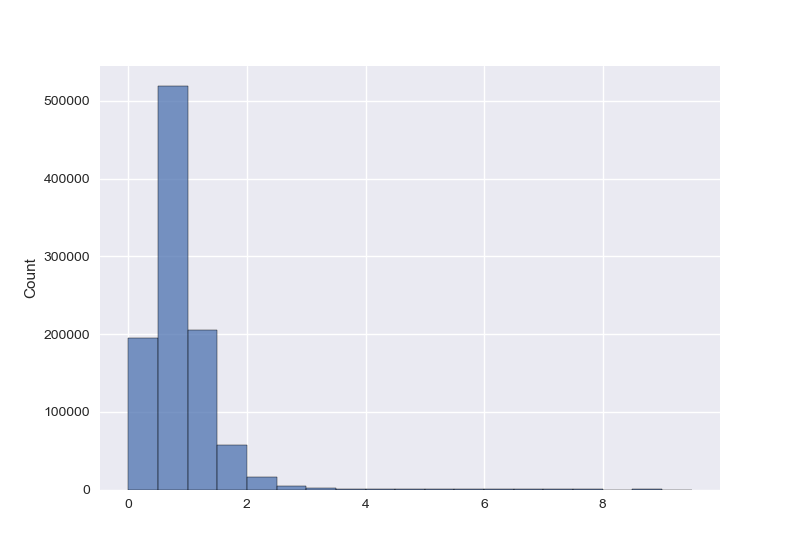

<IPython.core.display.Javascript object>

In [5]:
plt.figure()
sns.histplot(
    product_dataset.products.depth / product_dataset.products.width,
    bins=np.arange(0, 10, 0.5),
)
plt.show()

<IPython.core.display.Javascript object>


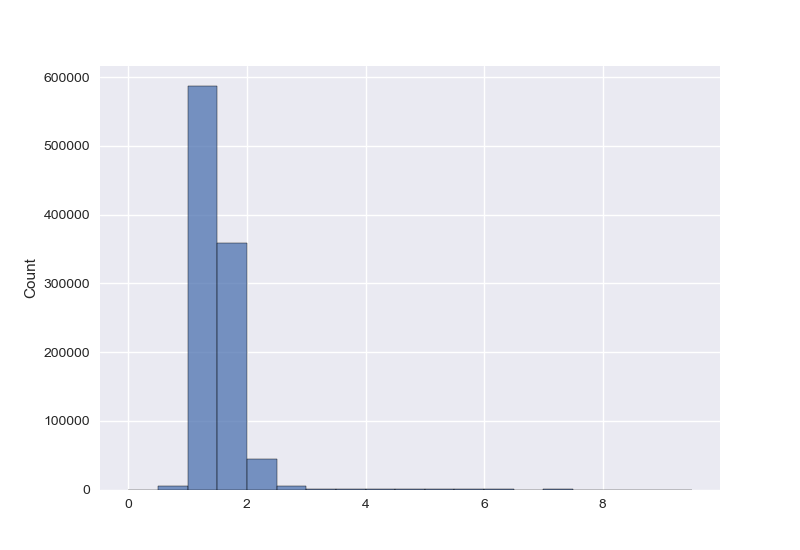

<IPython.core.display.Javascript object>

In [6]:
plt.figure()
sns.histplot(
    product_dataset.products.height / product_dataset.products.width,
    bins=np.arange(0, 10, 0.5),
)
plt.show()

<IPython.core.display.Javascript object>


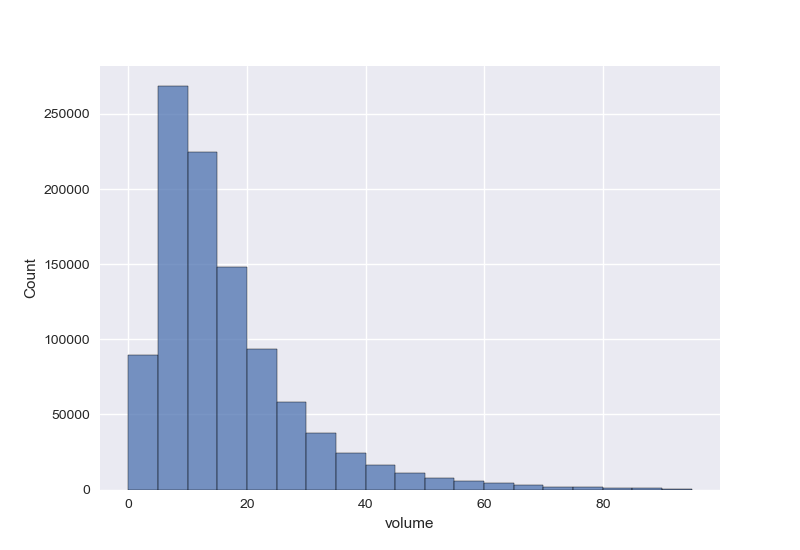

<IPython.core.display.Javascript object>

In [7]:
plt.figure()
sns.histplot(product_dataset.products.volume / 1e6, bins=np.arange(0, 100, 5))
plt.show()

<IPython.core.display.Javascript object>


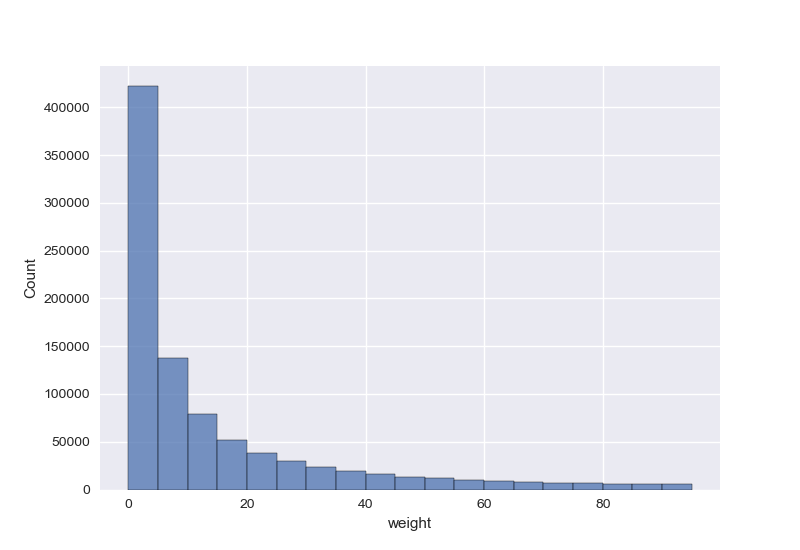

<IPython.core.display.Javascript object>

In [8]:
plt.figure()
sns.histplot(product_dataset.products.weight, bins=np.arange(0, 100, 5))
plt.show()

### Order

In [134]:
ordered_products = 500
order = product_dataset.get_order(ordered_products)
# order = product_dataset.get_dummy_order(ordered_products)
order.head()

id  width  depth  height  weight    volume
0  808094    300    144     320       5  13824000
1  530696    192    190     289      10  10542720
2  695763    270    200     408       2  22032000
3  263369    269    370     454       2  45186620
4  929700    181    281     297      24  15105717

<IPython.core.display.Javascript object>

## Martello's lower bounds

In [8]:
utils.get_l0_lb(order, config.PALLET_DIMS)

1.0

<IPython.core.display.Javascript object>

In [9]:
utils.get_l1_lb(order, config.PALLET_DIMS)

(0.0, 0.0, 0.0, 0.0)

<IPython.core.display.Javascript object>

In [10]:
utils.get_l2_lb(order, config.PALLET_DIMS)

100it [00:00, 204.90it/s]
100it [00:00, 228.45it/s]
100it [00:00, 228.52it/s]


(1.0, 1.0, 1.0, 1.0)

<IPython.core.display.Javascript object>

## Baseline

In [11]:
bl_layer_pool = main.baseline_procedure(order)
bl_layer_pool.to_dataframe()

Generating vertical superitems: 100%|████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Items not covered: 0/10


item    x    y  z  width  depth  height  layer
0     0  353    0  0    343    263     411      0
1     1    0    0  0    294    136     440      0
2     2    0  136  0    180     57     234      0
3     3    0  193  0    176    100     225      0
4     4  180  136  0    173    179     248      0
5     5    0  315  0    202    210     349      0
6     6    0  525  0    366    256     654      0
7     7  366  263  0    277    192     416      0
8     8  643  263  0    286    162     450      0
9     9  929    0  0    249    237     318      0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


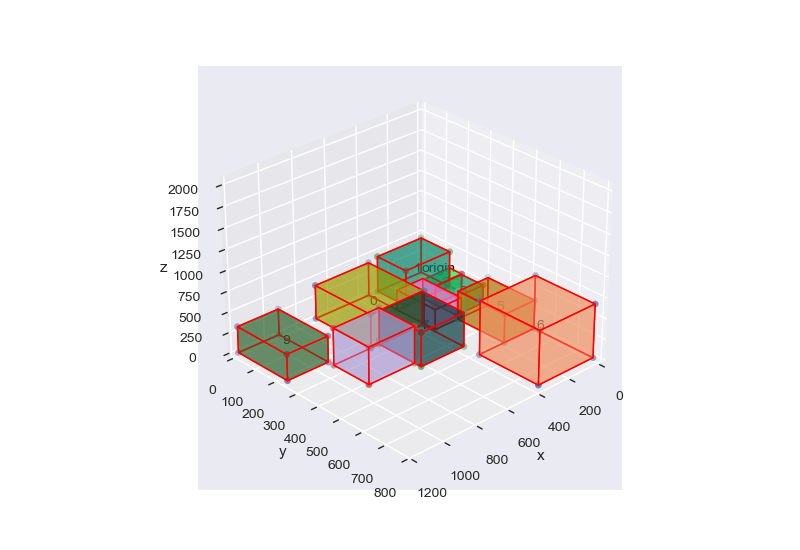

<IPython.core.display.Javascript object>

In [12]:
    bl_bin_pool = bins.BinPool(bl_layer_pool, config.PALLET_DIMS)
    bl_bin_pool.plot()

## Maxrects

In [135]:
mr_layer_pool = main.maxrect_procedure(order)
mr_layer_pool.to_dataframe()

Generating vertical superitems: 100%|████████████████████████████████████████| 165/165 [00:00<00:00, 165248.37it/s]


Height group 1/422
Height group 2/422
Height group 3/422
Height group 4/422
Height group 5/422
Height group 6/422
Height group 7/422
Height group 8/422
Height group 9/422
Height group 10/422
Height group 11/422
Height group 12/422
Height group 13/422
Height group 14/422
Height group 15/422
Height group 16/422
Height group 17/422
Height group 18/422
Height group 19/422
Height group 20/422
Height group 21/422
Height group 22/422
Height group 23/422
Height group 24/422
Height group 25/422
Height group 26/422
Height group 27/422
Height group 28/422
Height group 29/422
Height group 30/422
Height group 31/422
Height group 32/422
Height group 33/422
Height group 34/422
Height group 35/422
Height group 36/422
Height group 37/422
Height group 38/422
Height group 39/422
Height group 40/422
Height group 41/422
Height group 42/422
Height group 43/422
Height group 44/422
Height group 45/422
Height group 46/422
Height group 47/422
Height group 48/422
Height group 49/422
Height group 50/422
Height gr

Density 1126
Coverage 16
Couldn't rearrange layer:  10
Duplicates 15
Empty 15
15
Items not covered: 232/500


item    x    y    z  width  depth  height  layer
0     326    0    0    0    265    329     455      0
1     362    0  329    0    283    305     459      0
2     438    0  634    0    405    160     464      0
3     108  265    0    0    283    300     460      0
4     226  283  300    0    339    240     437      0
..    ...  ...  ...  ...    ...    ...     ...    ...
263   408  870  291    0    204    196     238     14
264   148  817  324  238    310    129     378     14
265    71  618  403    0    135    145     204     14
266   291  629  387  204    113    177     228     14
267   177  623  395  432    125    161     191     14

[268 rows x 8 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


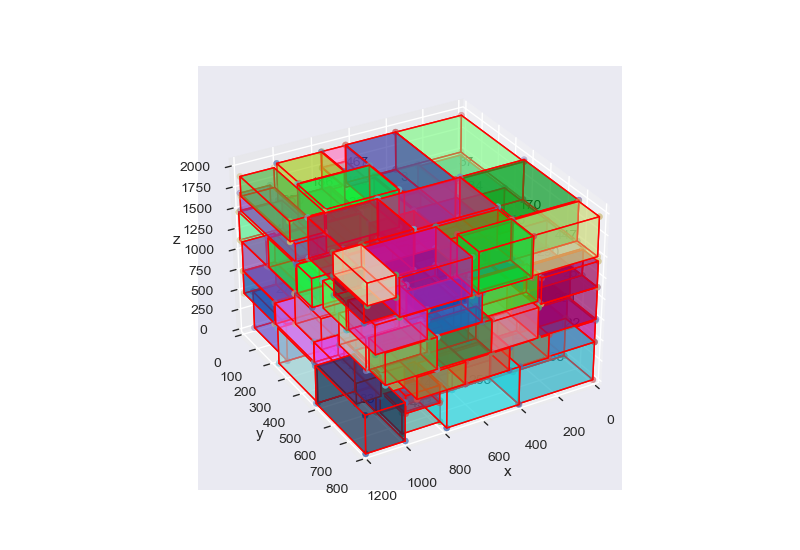

<IPython.core.display.Javascript object>


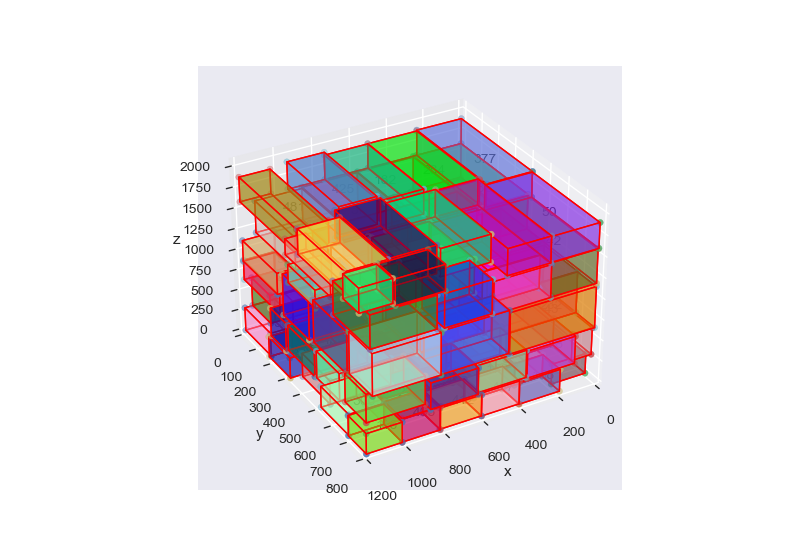

<IPython.core.display.Javascript object>


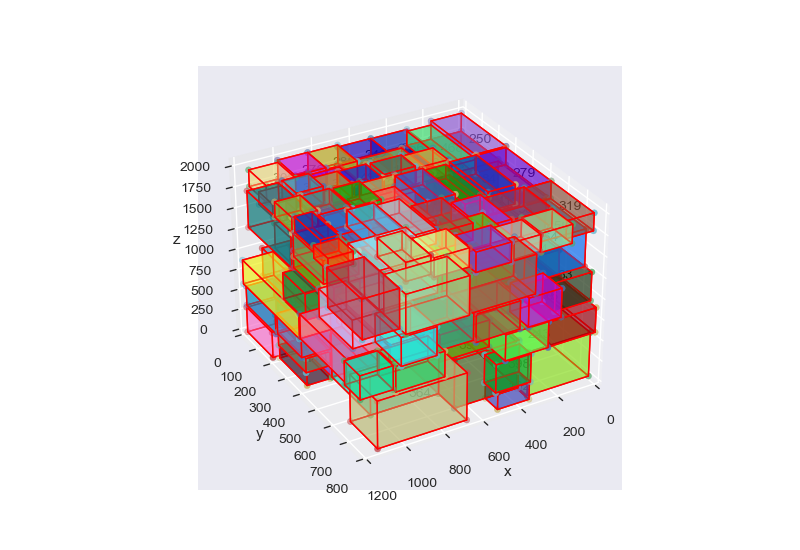

<IPython.core.display.Javascript object>


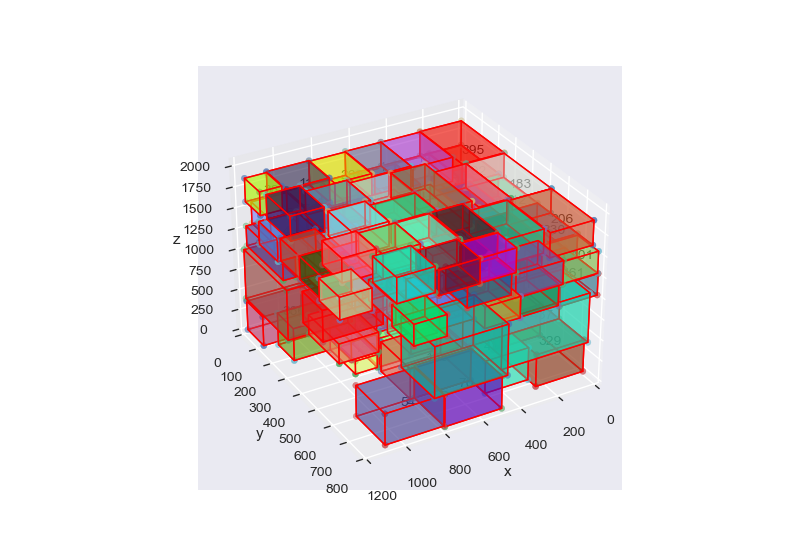

<IPython.core.display.Javascript object>


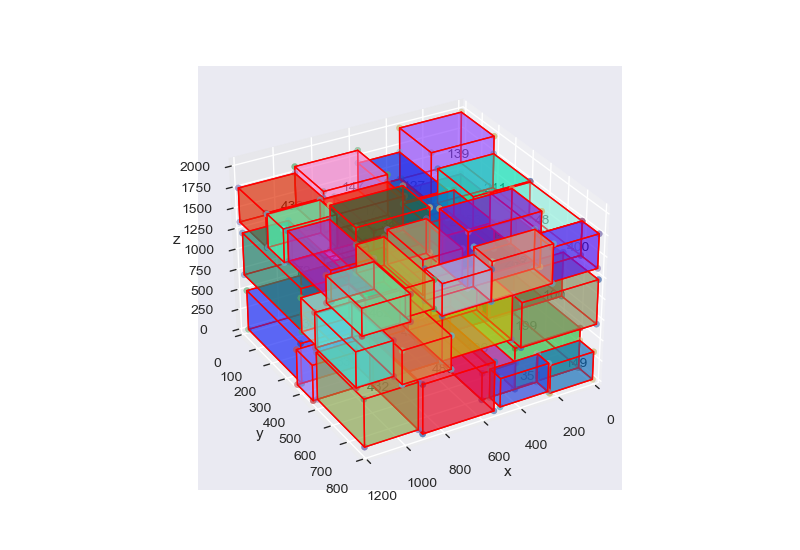

<IPython.core.display.Javascript object>


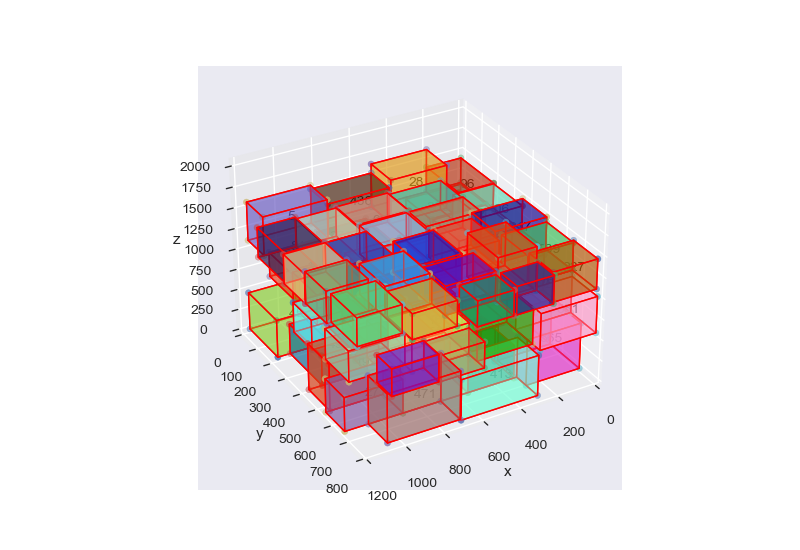

<IPython.core.display.Javascript object>


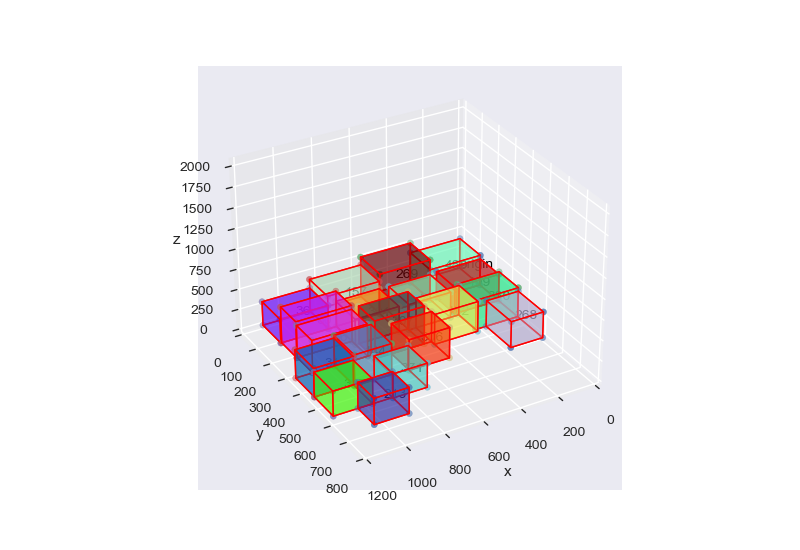

<IPython.core.display.Javascript object>

In [136]:
mr_bin_pool = bins.BinPool(mr_layer_pool, config.PALLET_DIMS)
mr_bin_pool.plot()

## Column generation

In [137]:
filtered_cg_layer_pool, cg_layer_pool, cg_bins_lbs = main.column_generation_procedure(
    order, use_height_groups=False
)
filtered_cg_layer_pool.to_dataframe()

Height group 1/1
Iteration 1/100
Solving RMP...
RMP var  526
RMP constraints  500
RMP iterations  473
RMP objective: 13691.0
Duals: [  0.   0.   0.   0.   0.   0.   0. 366.   0.   0.   0.   0.   0.   0.
   0.   0. 226.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0. 244. 396.   0.   0. 302.   0.   0.
   0.   0. 184.   0.   0.   0. 204.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 420.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 319.   0.   0.   0. 177.   0.   0.   0.   0.   0.   0.  31.   0.
   0.   0.   0.   0.   0. 300.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0. 

Iteration 3/100
Solving RMP...
RMP var  528
RMP constraints  500
RMP iterations  475
RMP objective: 13691.0
Duals: [  0.   0. 408.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0. 453.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  35. 260.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0. 211.   0. 451.   0.   0.   0.  68.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 412.
   0.   0.   0.   0.   0.   0.   0. 307.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. 181.   0. 460. 251.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 268.
   0.  91.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 451.   0.   0. 322.   0. 28

Iteration 5/100
Solving RMP...
RMP var  530
RMP constraints  500
RMP iterations  498
RMP objective: 13691.0
Duals: [320.   0.   0.   0.   0.   0.   0. 366. 275.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 304.   0.   0.
   0.   0. 498.   0.   0.  76.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 111.   0. 186.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 461.
   0.   0.   0. 571.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0. 258.   0.   0.   0.   0.   0.   0.   0.   0.   0. 271.
   0.   0. 260.   0.   0. 390.   0.   0. 508.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 328.   0.   0.
   0. 341.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   

Iteration 7/100
Solving RMP...
RMP var  532
RMP constraints  500
RMP iterations  514
RMP objective: 13691.0
Duals: [  0.    0.  408.    0.    0.    0.    0.    0.  237.    0.    0.  291.
   0.    0.  424.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.  400.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.  240.    0.  356.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.  252.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.  271.  278.    0.    0.    0.    0.    0.  207.    0.
   0.  244.    0.    0.    0.    0.    0.  332.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.  368.    0.    0.    0.    0.    0.
   0.    0.    0.    

Iteration 9/100
Solving RMP...
RMP var  534
RMP constraints  500
RMP iterations  513
RMP objective: 13691.0
Duals: [320.           0.           0.           0.           0.
   0.           0.           0.         275.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.         298.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.          11.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.         297.           0.
   0.         204.           0.           0.         137.
   0.          

Iteration 10/100
Solving RMP...
RMP var  535
RMP constraints  500
RMP iterations  536
RMP objective: 13691.0
Duals: [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 251.  34.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 244.   0.   0. 432.
   0.   0.   0.   0. 324.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 160. 101.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 282.   0.   0.   0.   0.   0.   0. 342.   0.   0.   0.   0. 297.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  91.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 308.   0.
   9.   0.   0.   0.   0. 243.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. 329.   0.   0. 231. 356.   0.   0.   0.   0.
 322.   0.   0.   0. 113.   0.   0.   0.   0.   0. 317.   0.   0.   0.
 261.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 193.   0.   0.   0.   0.   0.   0.   0.
   0.   0.  73.   0.   0.   0.  

Iteration 12/100
Solving RMP...
RMP var  537
RMP constraints  500
RMP iterations  522
RMP objective: 13691.0
Duals: [  0.           0.           0.         184.           0.
   0.           0.           0.           0.           0.
   0.           0.         332.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.         402.           0.           0.           0.
   0.           0.           0.           0.           0.
  60.           0.         391.11111111   0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.         271.
   0.           0.           0.           0.           0.
   0.           0.           0.         434.         240.
   0.           0.           0.           0.           0.
   0.         207.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.         

Iteration 13/100
Solving RMP...
RMP var  538
RMP constraints  500
RMP iterations  532
RMP objective: 13691.0
Duals: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.39488462e-14 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.84000000e+02
 0.00000000e+00 1.03000000e+02 0.00000000e+00 0.00000000e+00
 1.87000000e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00

Iteration 14/100
Solving RMP...
RMP var  539
RMP constraints  500
RMP iterations  538
RMP objective: 13691.0
Duals: [  0.   0.   0.   0.   0.   0.   0. 366.   0.   0.   0.   0.   0.   0.
   0. 338.  59.  77.   0.   0.   0. 257.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. 432.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 456.   0.   0.   0.   0. 260.   0.   0.   0.   0.
   0. 400.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 280.
 103.   0. 513.   0.   0.   0. 204.   0. 478.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 222.   0.   0.
 251.   0.  95.   0.   0.   0. 116.   0.  34.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0. 234.   0.   0.   0.   0.   0.   0.   0.   0.   0. 154.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  87. 159.   0.   0.   0.
  61.   0.   0.   0.   0.   0.   0.   0. 204.   0.   0.   0.   0.   0.
   0.   0.  85.   0. 322.   0.  

Iteration 16/100
Solving RMP...
RMP var  541
RMP constraints  500
RMP iterations  531
RMP objective: 13691.0
Duals: [  0.           0.           0.           0.         260.
   0.           0.           0.           0.           0.
 208.           0.           0.           0.           0.
   0.           0.         171.97560976   0.           0.
 237.56097561   0.           0.           0.           0.
   0.           0.           0.           0.           0.
 281.65853659   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.         355.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
 338.           0.         237.65853659   0.           0.
 449.           0.           0.           0.           0.
   0.           0.           0.         297.           0.
   0.           0.         258.87804878   0.           0.
   0.         

Iteration 17/100
Solving RMP...
RMP var  542
RMP constraints  500
RMP iterations  552
RMP objective: 13691.0
Duals: [  0.    0.    0.    0.    0.    0.  206.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  300.2   0.  153.6   0.    0.    0.    0.    0.    0.    0.  208.
   0.    0.    0.    0.    0.    0.    0.  395.  187.    0.    0.    0.
   0.   87.    0.    0.    0.    0.  271.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  311.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.  310.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.  237.    0.    0.    0.    0.    0.
   0.    0.  127.    0.    0.    0.  308.  332.    0.    0.    0.    0.
   0.    0.  403.8   0.    0.    0.  193.    0.    0.    0.    0.    0.
   0.    0.    0.   

Iteration 19/100
Solving RMP...
RMP var  544
RMP constraints  500
RMP iterations  558
RMP objective: 13691.0
Duals: [  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.         287.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.         271.04954955   0.
 208.           0.           0.           0.           0.
   0.           0.           0.           0.         138.69369369
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.         143.18018018   0.           0.
   0.          90.59009009   0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.         193.           0.
   0. 

Iteration 20/100
Solving RMP...
RMP var  545
RMP constraints  500
RMP iterations  548
RMP objective: 13691.0
Duals: [  0.         289.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.         434.81818182
   0.           0.           0.         127.18181818   0.
   0.           0.         305.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.          90.90909091   0.
   0.         272.           0.           0.           0.
   0.           0.           0.          34.09090909   0.
   0.           0.         198.81818182   0.         460.
   0. 

Iteration 21/100
Solving RMP...
RMP var  546
RMP constraints  500
RMP iterations  540
RMP objective: 13691.0
Duals: [  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
 247.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.         196.
 191.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.         244.
   0.           0.           0.           0.           0.
   0.         220.84615385   0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.         159.53846154   0.           0.
   0.         

Duplicates 25
Empty 25
{0: True, 1: True, 2: True, 3: True, 4: True, 5: True, 6: False, 7: True, 8: True, 9: True, 10: True, 11: True, 12: True, 13: True, 14: True, 15: True, 16: True, 17: True, 18: True, 19: True, 20: True, 21: True, 22: True, 23: True, 24: True, 25: True, 26: True, 27: True, 28: True, 29: True, 30: True, 31: True, 32: True, 33: True, 34: True, 35: True, 36: True, 37: True, 38: True, 39: True, 40: True, 41: True, 42: True, 43: True, 44: True, 45: True, 46: True, 47: True, 48: True, 49: True, 50: True, 51: True, 52: True, 53: True, 54: True, 55: True, 56: True, 57: True, 58: True, 59: True, 60: True, 61: True, 62: True, 63: True, 64: True, 65: True, 66: True, 67: True, 68: True, 69: True, 70: True, 71: False, 72: True, 73: True, 74: True, 75: True, 76: True, 77: True, 78: True, 79: True, 80: True, 81: True, 82: True, 83: True, 84: True, 85: True, 86: True, 87: True, 88: True, 89: True, 90: True, 91: True, 92: True, 93: True, 94: True, 95: True, 96: True, 97: True, 98: 

item     x    y  z  width  depth  height  layer
0      37     0    0  0    364    375     453      0
1     410     0  375  0    324    416     542      0
2     199   324  375  0    353    381     492      0
3     243   364    0  0    335    354     537      0
4      39   677  354  0    340    332     584      0
..    ...   ...  ... ..    ...    ...     ...    ...
476   345   638    0  0    377    161     527     24
477   481  1015    0  0    160    381     293     24
478    83   757  161  0    200    309     461     24
479   396   957  381  0    166    367     255     24
480   201   704  470  0    236    257     317     24

[481 rows x 8 columns]

<IPython.core.display.Javascript object>

In [52]:
for i, l in enumerate(cg_layer_pool):
    display(l.to_dataframe())
    print(i)

item    x    y  z  width  depth  height
0      8    0    0  0    534    214     584
1     21  534    0  0    386    296     525
2     29  920    0  0    273    279     451
3     36  920  279  0    251    189     401
4     43    0  214  0    351    189     418
5      4  351  296  0    298    221     395
6     13    0  403  0    283    217     611
7     40  649  296  0    207    194     413
8     47  856  468  0    285    163     476
9     49  649  490  0    185    151     383
10    18  834  631  0    314    140     469
11    30  283  517  0    241    162     448
12    14  524  641  0    268    139     422
13     6    0  620  0    251    133     399

0


item    x    y  z  width  depth  height
0      8    0    0  0    534    214     584
1     21  534    0  0    386    296     525
2     29  920    0  0    273    279     451
3     36  920  279  0    251    189     401
4     43    0  214  0    351    189     418
5      4  351  296  0    298    221     395
6     13    0  403  0    283    217     611
7     40  649  296  0    207    194     413
8     47  856  468  0    285    163     476
9     49  649  490  0    185    151     383
10    18  834  631  0    314    140     469
11    30  283  517  0    241    162     448
12    14  524  641  0    268    139     422
13     6    0  620  0    251    133     399

1


item    x    y  z  width  depth  height
0     23    0    0  0    228    379     354
1     42    0  379  0    228    316     363
2     44    0  695  0    212     96     331
3     43  228    0  0    351    189     418
4     10  579    0  0    254    208     346
5      7  228  189  0    270    183     365
6      0  833    0  0    229    214     367
7     46  498  208  0    318    139     362
8      1  816  214  0    257    167     355
9     38  498  347  0    223    191     316
10     2  228  372  0    221    185     337
11    31  449  538  0    203    192     339
12    39  228  557  0    198    149     342
13    26  652  538  0    260    146     331
14    35  721  381  0    237    140     369
15    25  912  521  0    190    146     365

2


item    x    y  z  width  depth  height
0      8    0    0  0    534    214     584
1     21  534    0  0    386    296     525
2     29  920    0  0    273    279     451
3      7  920  279  0    270    183     365
4      0    0  214  0    229    214     367
5     36  229  214  0    251    189     401
6     38  480  296  0    223    191     316
7      2  229  403  0    221    185     337
8     48    0  428  0    135    280     302
9     22  703  296  0    215    173     309
10    16  918  462  0    205    170     218
11    32  703  469  0    156    195     280
12     6  859  632  0    251    133     399
13    35  450  487  0    237    140     369
14    39  135  588  0    198    149     342
15    33  333  627  0    183    154     286
16    49  516  627  0    185    151     383
17    27  701  664  0    153    136     229

3


item     x    y  z  width  depth  height
0      4     0    0  0    298    221     395
1     34     0  221  0    172    317     256
2     12     0  538  0    196    251     272
3      1   172  221  0    257    167     355
4     37   172  388  0    253    128     307
5     31   298    0  0    203    192     339
6     48   196  516  0    135    280     302
7     22   331  516  0    215    173     309
8     19   331  689  0    178    105     214
9     20   509  689  0    178     88     228
10    45   425  388  0    171     70     298
11    41   546  458  0    205    180     269
12    33   687  638  0    183    154     286
13    16   429  192  0    205    170     218
14    15   501    0  0    193    172     228
15     5   634  172  0    151    219     307
16     9   694    0  0    180    170     289
17    32   751  391  0    156    195     280
18     3   870  586  0    138    191     220
19    24   785  170  0    159    152     245
20    27   874    0  0    153    136     229
21    17   907  322  0    156    131     237
22    11  1027    0  0    127    305     189
23    28  1008  453  0    103    196     229

4


item    x    y  z  width  depth  height
0      8    0    0  0    534    214     584
1     21  534    0  0    386    296     525
2     42  920    0  0    228    316     363
3     13    0  214  0    283    217     611
4      2  283  214  0    221    185     337
5     46  504  296  0    318    139     362
6     40  283  399  0    207    194     413
7     30    0  431  0    241    162     448
8     18  822  316  0    314    140     469
9     35  490  435  0    237    140     369
10    37  490  575  0    253    128     307
11     9    0  593  0    180    170     289
12    33  180  593  0    183    154     286
13    49  743  456  0    185    151     383

5


item     x    y  z  width  depth  height
0     23     0    0  0    228    379     354
1     34     0  379  0    172    317     256
2     20     0  696  0    178     88     228
3     12   172  379  0    196    251     272
4     47   178  630  0    285    163     476
5     36   228    0  0    251    189     401
6     26   228  189  0    260    146     331
7     22   479    0  0    215    173     309
8     48   368  335  0    135    280     302
9     37   488  173  0    253    128     307
10    16   694    0  0    205    170     218
11    41   463  615  0    205    180     269
12    11   503  301  0    127    305     189
13    15   630  301  0    193    172     228
14    17   741  170  0    156    131     237
15    27   630  473  0    153    136     229
16     9   668  609  0    180    170     289
17    19   783  473  0    178    105     214
18    33   823  301  0    183    154     286
19    45   897  170  0    171     70     298
20    24   899    0  0    159    152     245
21     5   848  578  0    151    219     307
22    32   999  455  0    156    195     280
23     3  1006  240  0    138    191     220
24    28  1068    0  0    103    196     229

6


item    x    y  z  width  depth  height
0      8    0    0  0    534    214     584
1     21  534    0  0    386    296     525
2     29  920    0  0    273    279     451
3     42  920  279  0    228    316     363
4     38    0  595  0    223    191     316
5     34  223  214  0    172    317     256
6     40    0  214  0    207    194     413
7     22    0  408  0    215    173     309
8      0  223  531  0    229    214     367
9     14  395  296  0    268    139     422
10    44  395  435  0    212     96     331
11    39  607  435  0    198    149     342
12    20  663  296  0    178     88     228
13    33  452  584  0    183    154     286

7


item    x    y  z  width  depth  height
0     29    0    0  0    273    279     451
1     42    0  279  0    228    316     363
2     18    0  595  0    314    140     469
3     10  228  279  0    254    208     346
4     44  228  487  0    212     96     331
5      0  314  583  0    229    214     367
6     40  273    0  0    207    194     413
7     30  480    0  0    241    162     448
8     19  480  162  0    178    105     214
9     11  482  267  0    127    305     189
10    41  543  572  0    205    180     269
11     6  609  267  0    251    133     399
12    33  609  400  0    183    154     286
13    25  748  554  0    190    146     365
14     3  721    0  0    138    191     220

8


item    x    y  z  width  depth  height
0     23    0    0  0    228    379     354
1     42    0  379  0    228    316     363
2     44    0  695  0    212     96     331
3     13  228    0  0    283    217     611
4     10  511    0  0    254    208     346
5      7  765    0  0    270    183     365
6      0  765  183  0    229    214     367
7     31  994  183  0    203    192     339
8     39  994  375  0    198    149     342
9     38  511  208  0    223    191     316
10     1  734  397  0    257    167     355
11    25  991  524  0    190    146     365
12     2  228  217  0    221    185     337
13    26  449  399  0    260    146     331
14    46  228  545  0    318    139     362
15    35  546  564  0    237    140     369

9


item    x    y  z  width  depth  height
0     21    0    0  0    386    296     525
1     29    0  296  0    273    279     451
2     10    0  575  0    254    208     346
3     38  254  575  0    223    191     316
4      2  273  296  0    221    185     337
5     30  477  481  0    241    162     448
6     39  477  643  0    198    149     342
7     33  675  643  0    183    154     286
8     48  386    0  0    135    280     302
9     49  494  280  0    185    151     383
10    28  521    0  0    103    196     229
11    11  679    0  0    127    305     189

10


item    x    y  z  width  depth  height
0     21    0    0  0    386    296     525
1     29    0  296  0    273    279     451
2      7    0  575  0    270    183     365
3      0  270  575  0    229    214     367
4     40  273  296  0    207    194     413
5     22  386    0  0    215    173     309
6     11  480  173  0    127    305     189
7     39  601    0  0    198    149     342
8     32  499  478  0    156    195     280
9     33  607  149  0    183    154     286
10    49  607  303  0    185    151     383
11    28  655  454  0    103    196     229

11


item     x    y  z  width  depth  height
0      8     0    0  0    534    214     584
1     10   534    0  0    254    208     346
2      7   788    0  0    270    183     365
3     28  1058    0  0    103    196     229
4      2   788  183  0    221    185     337
5     33  1009  196  0    183    154     286
6     49  1009  350  0    185    151     383
7     35   534  208  0    237    140     369
8     46     0  214  0    318    139     362
9     39   318  214  0    198    149     342
10    14   516  348  0    268    139     422
11    25   784  368  0    190    146     365
12    24   974  501  0    159    152     245
13    45     0  353  0    171     70     298

12


item    x    y  z  width  depth  height
0     21    0    0  0    386    296     525
1      7    0  296  0    270    183     365
2     46    0  479  0    318    139     362
3     18  270  296  0    314    140     469
4     30    0  618  0    241    162     448
5      6  241  618  0    251    133     399
6     33  318  436  0    183    154     286
7     38  492  590  0    223    191     316
8     44  501  436  0    212     96     331
9      5  386    0  0    151    219     307
10    45  386  219  0    171     70     298

13


item    x    y  z  width  depth  height
0    29    0    0  0    273    279     451
1    42    0  279  0    228    316     363
2    30    0  595  0    241    162     448
3    10  228  279  0    254    208     346
4    12  273    0  0    196    251     272
5    14  469    0  0    268    139     422
6    35  469  139  0    237    140     369
7    39  241  487  0    198    149     342
8    17  241  636  0    156    131     237
9    28  439  487  0    103    196     229

14


item     x    y  z  width  depth  height
0     8     0    0  0    534    214     584
1    29   534    0  0    273    279     451
2    42     0  214  0    228    316     363
3     2   228  214  0    221    185     337
4    40   807    0  0    207    194     413
5    28  1014    0  0    103    196     229
6    25   807  194  0    190    146     365
7    19   997  196  0    178    105     214
8    22   449  279  0    215    173     309
9    35   664  340  0    237    140     369

15


item    x    y  z  width  depth  height
0    29    0    0  0    273    279     451
1    10    0  279  0    254    208     346
2    47    0  487  0    285    163     476
3    18    0  650  0    314    140     469
4    14  254  279  0    268    139     422
5    16  285  418  0    205    170     218
6    35  314  588  0    237    140     369
7    45  314  728  0    171     70     298
8    33  490  418  0    183    154     286
9    44  551  572  0    212     96     331

16


item    x    y  z  width  depth  height
0    42    0    0  0    228    316     363
1    10    0  316  0    254    208     346
2     0  228    0  0    229    214     367
3    38    0  524  0    223    191     316
4    14  223  524  0    268    139     422
5     6  223  663  0    251    133     399
6    19  474  663  0    178    105     214
7    15  254  214  0    193    172     228
8    49  447  214  0    185    151     383
9    28  457    0  0    103    196     229

17


item    x    y  z  width  depth  height
0     42    0    0  0    228    316     363
1     18    0  316  0    314    140     469
2      2  228    0  0    221    185     337
3     20  228  185  0    178     88     228
4     40    0  456  0    207    194     413
5     14    0  650  0    268    139     422
6      6  207  456  0    251    133     399
7     39  314  273  0    198    149     342
8     49  268  589  0    185    151     383
9     27  453  589  0    153    136     229
10    11  512    0  0    127    305     189

18


item    x    y  z  width  depth  height
0    21    0    0  0    386    296     525
1    42    0  296  0    228    316     363
2    14    0  612  0    268    139     422
3    22  228  296  0    215    173     309
4    35  228  469  0    237    140     369
5    16  268  609  0    205    170     218
6    39  386    0  0    198    149     342
7    49  443  149  0    185    151     383

19


item     x    y  z  width  depth  height
0     8     0    0  0    534    214     584
1    29   534    0  0    273    279     451
2    10     0  214  0    254    208     346
3     0   254  214  0    229    214     367
4    11     0  422  0    127    305     189
5    15   807    0  0    193    172     228
6    39  1000    0  0    198    149     342
7    33  1000  149  0    183    154     286

20


item    x    y  z  width  depth  height
0     8    0    0  0    534    214     584
1    21  534    0  0    386    296     525
2     6  920    0  0    251    133     399
3    33  920  133  0    183    154     286
4    25  920  287  0    190    146     365
5    44    0  214  0    212     96     331
6    45  212  214  0    171     70     298

21


item    x    y  z  width  depth  height
0    42    0    0  0    228    316     363
1    12    0  316  0    196    251     272
2     0    0  567  0    229    214     367
3    46  196  316  0    318    139     362
4    44  196  455  0    212     96     331
5    18  229  551  0    314    140     469
6     6  228    0  0    251    133     399
7    33  228  133  0    183    154     286
8    28  479    0  0    103    196     229

22


item    x    y  z  width  depth  height
0    42    0    0  0    228    316     363
1    36    0  316  0    251    189     401
2    40  228    0  0    207    194     413
3    45  228  194  0    171     70     298
4     6    0  505  0    251    133     399
5    39    0  638  0    198    149     342
6    33  198  638  0    183    154     286

23


item     x    y  z  width  depth  height
0     8     0    0  0    534    214     584
1    10   534    0  0    254    208     346
2    18   788    0  0    314    140     469
3    38   788  140  0    223    191     316
4    33  1011  140  0    183    154     286
5    45  1011  294  0    171     70     298

24


item    x    y  z  width  depth  height
0    29    0    0  0    273    279     451
1     0    0  279  0    229    214     367
2    46    0  493  0    318    139     362
3    33    0  632  0    183    154     286
4    49  183  632  0    185    151     383
5    45  229  279  0    171     70     298

25


<IPython.core.display.Javascript object>

In [139]:
cg_layer_pool[39].superitems_pool.to_dataframe()

width  depth  height          ids                 type
0     352    259     457          [5]  SingleItemSuperitem
1     345    191     446          [0]  SingleItemSuperitem
2     345    191     845       [0, 6]    VerticalSuperitem
3     378    126     489          [9]  SingleItemSuperitem
4     330    191     399          [6]  SingleItemSuperitem
5     210    182     324          [4]  SingleItemSuperitem
6     149    165     246         [16]  SingleItemSuperitem
7     135    165     198         [19]  SingleItemSuperitem
8     190    181     285          [1]  SingleItemSuperitem
9     154    142     266         [13]  SingleItemSuperitem
10    255    198     326         [15]  SingleItemSuperitem
11    175    209     333         [14]  SingleItemSuperitem
12    175    204     272          [7]  SingleItemSuperitem
13    175    204     605      [7, 12]    VerticalSuperitem
14    175    204     877  [7, 11, 12]    VerticalSuperitem
15    175    183     333         [12]  SingleItemSuperitem
16    135    208     418      [8, 19]    VerticalSuperitem
17    158    175     272         [11]  SingleItemSuperitem
18    158    175     518     [11, 16]    VerticalSuperitem
19     81    208     220          [8]  SingleItemSuperitem

<IPython.core.display.Javascript object>

In [134]:
zsl = cg_layer_pool.get_zsl()[:, 39]

<IPython.core.display.Javascript object>

In [138]:
fsi, _, _ = cg_layer_pool.superitems_pool.get_fsi()
print(fsi.shape)

(31, 20)


<IPython.core.display.Javascript object>

In [140]:
for i in range(20):
    print(sum([fsi[s, i] * zsl[s] for s in range(31)]) <= 1)

False
True
True
True
True
True
False
False
False
True
True
False
False
True
True
True
False
True
True
False


<IPython.core.display.Javascript object>

In [75]:
filtered_cg_layer_pool.to_dataframe()

item    x    y  z  width  depth  height  layer
0     23    0    0  0    228    379     354      0
1     42    0  379  0    228    316     363      0
2     44    0  695  0    212     96     331      0
3     10  228    0  0    254    208     346      0
4      7  482    0  0    270    183     365      0
5      0  752    0  0    229    214     367      0
6      1  482  183  0    257    167     355      0
7     38  228  208  0    223    191     316      0
8     31  981    0  0    203    192     339      0
9     48  981  192  0    135    280     302      0
10     2  739  214  0    221    185     337      0
11    26  451  350  0    260    146     331      0
12    22  228  399  0    215    173     309      0
13    35  711  399  0    237    140     369      0
14     5  443  496  0    151    219     307      0
15    39  228  572  0    198    149     342      0
16    25  948  472  0    190    146     365      0
17    46  594  539  0    318    139     362      0
18    37  912  618  0    253    128     307      0
19     8    0    0  0    534    214     584      1
20    21  534    0  0    386    296     525      1
21    29  920    0  0    273    279     451      1
22    36  920  279  0    251    189     401      1
23    43    0  214  0    351    189     418      1
24     4  351  296  0    298    221     395      1
25    13    0  403  0    283    217     611      1
26    40  649  296  0    207    194     413      1
27    47  856  468  0    285    163     476      1
28    49  649  490  0    185    151     383      1
29    18  834  631  0    314    140     469      1
30    30  283  517  0    241    162     448      1
31    14  524  641  0    268    139     422      1
32     6    0  620  0    251    133     399      1

<IPython.core.display.Javascript object>

In [116]:
print(filtered_cg_layer_pool.get_densities(two_dims=False))
print(filtered_cg_layer_pool.get_densities(two_dims=True))

[0.6973016855012301, 0.6823537883499171, 0.6359838259889471, 0.615848281142167, 0.5515151041666667]
[0.9262229166666667, 0.924209375, 0.93401875, 0.8849697916666667, 0.7677895833333334]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


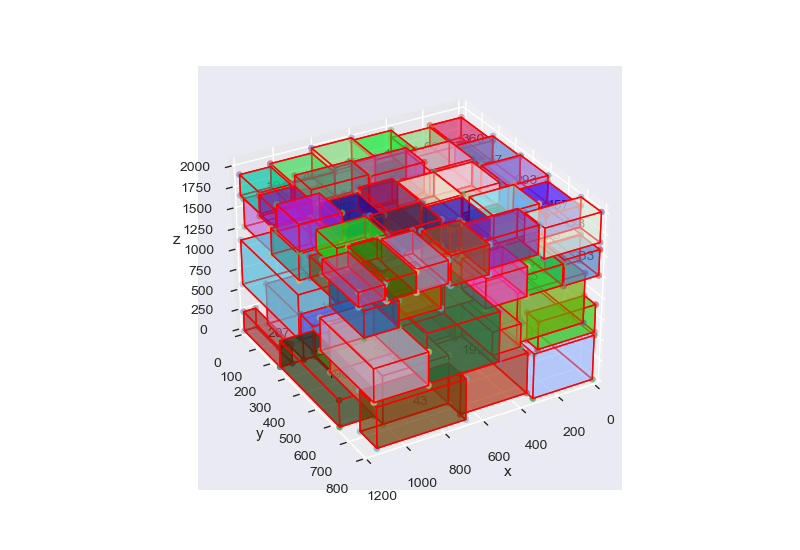

<IPython.core.display.Javascript object>


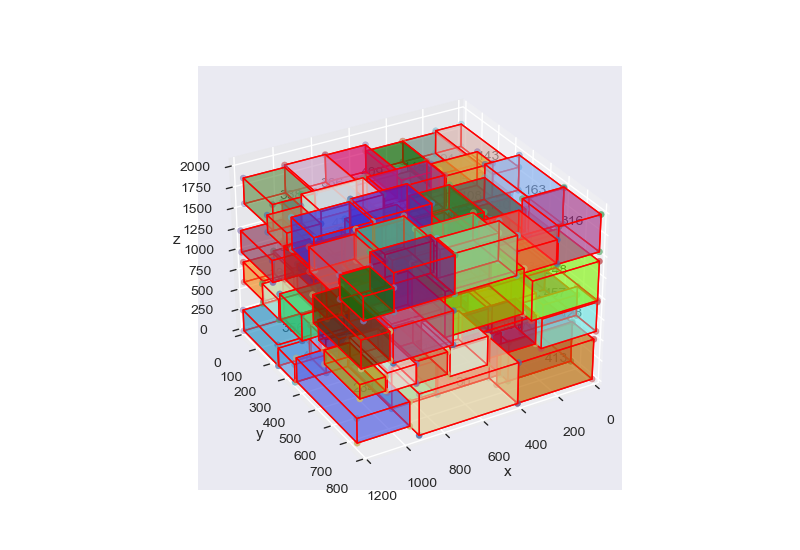

<IPython.core.display.Javascript object>


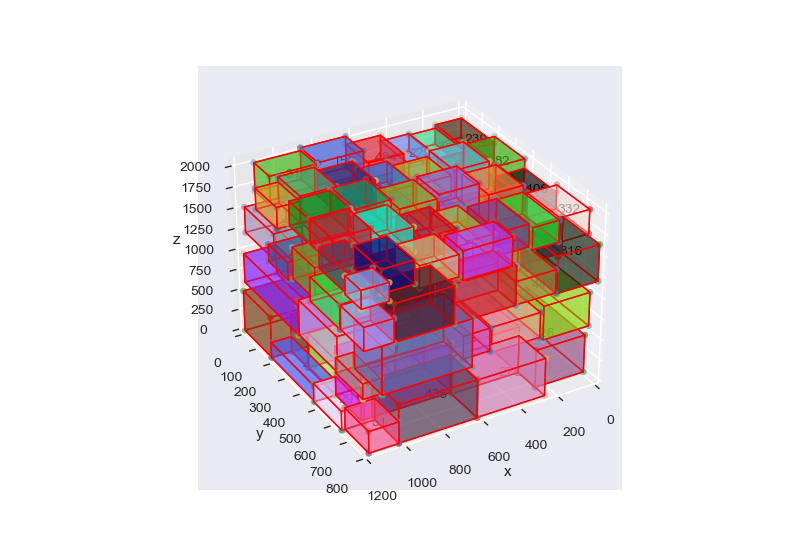

<IPython.core.display.Javascript object>


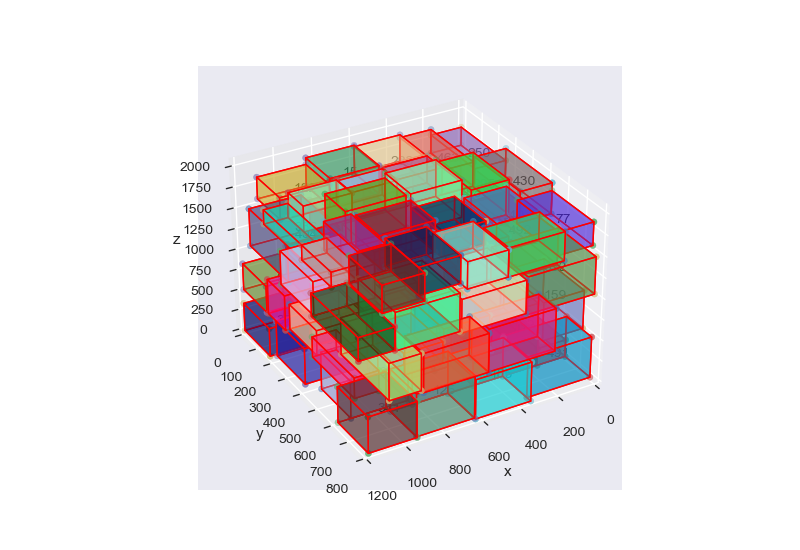

<IPython.core.display.Javascript object>


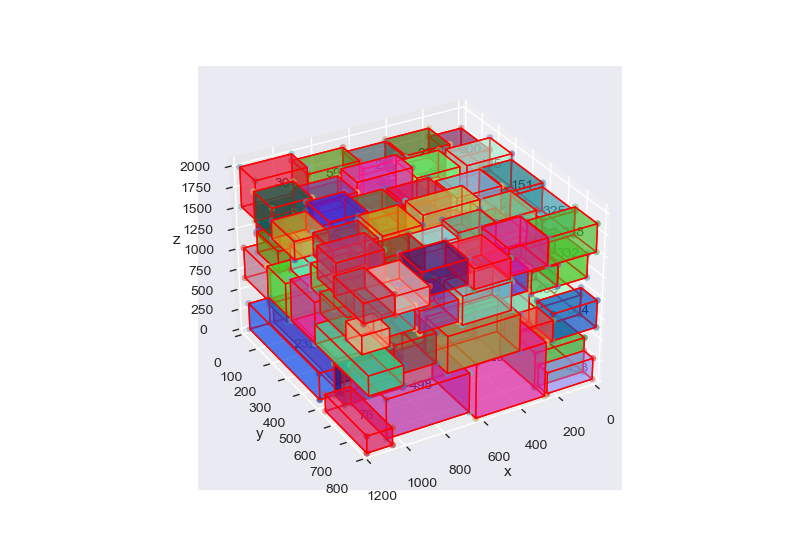

<IPython.core.display.Javascript object>


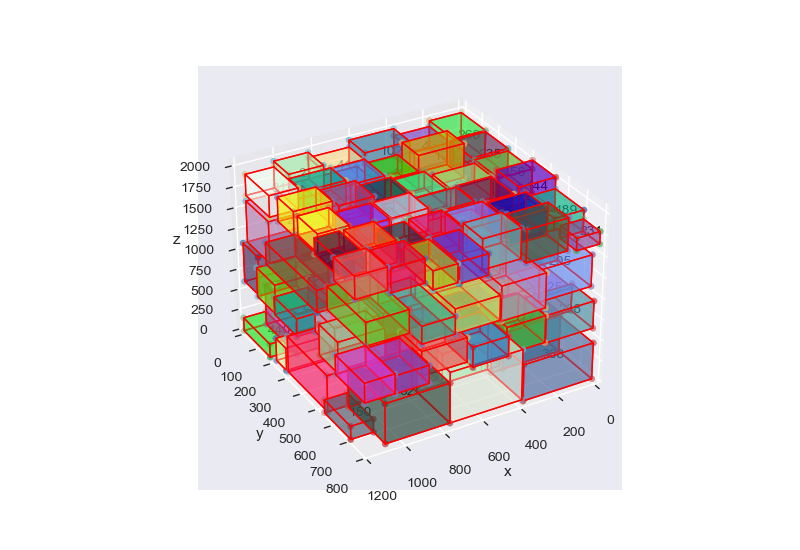

<IPython.core.display.Javascript object>


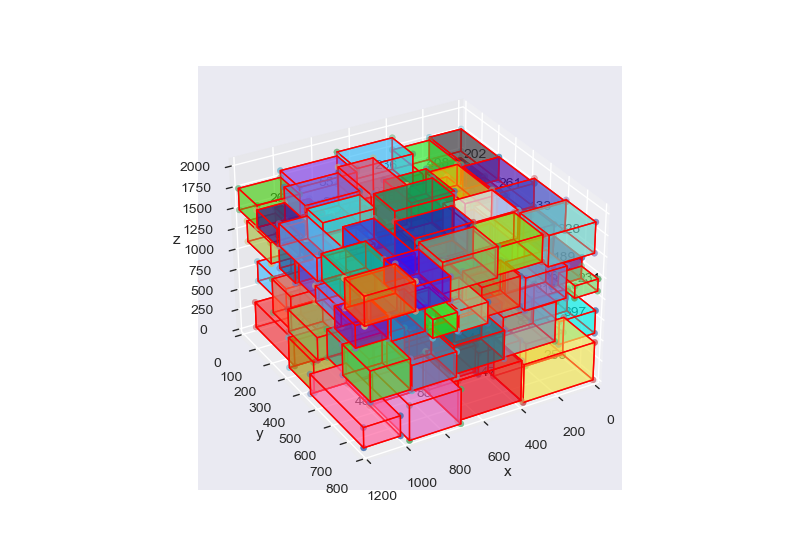

<IPython.core.display.Javascript object>


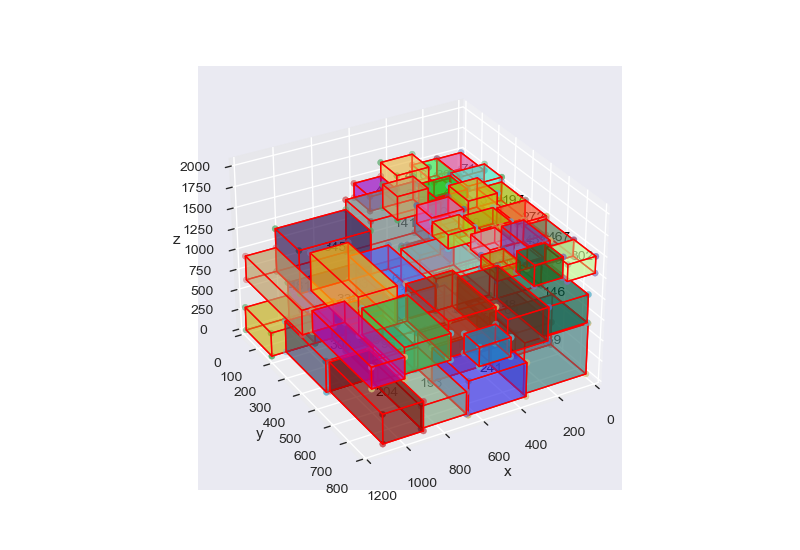

<IPython.core.display.Javascript object>

In [138]:
cg_bin_pool = bins.BinPool(filtered_cg_layer_pool, config.PALLET_DIMS)
cg_bin_pool.plot()

In [ ]:
np.floor(np.mean(cg_bins_lbs) / config.PALLET_HEIGHT)

## Comparison

In [139]:
print("\tCG")
print("Bin Heights:", cg_bin_pool.get_heights())
print()
print("Layer Densities:", filtered_cg_layer_pool.get_densities(two_dims=False))
print()
print("\tMR")
print("Bin Heights:", mr_bin_pool.get_heights())
print()
print("Layer Densities:", mr_layer_pool.get_densities(two_dims=False))

	CG
Bin Heights: [2034, 2010, 2039, 2004, 1994, 2049, 2018, 1627]

Layer Densities: [0.7864122324486301, 0.7457554559918348, 0.7386535275239339, 0.7179562878787878, 0.7037484668230563, 0.702085547556719, 0.7018880607638889, 0.6993829700413223, 0.6972340277777778, 0.6942901274271844, 0.6862396118721461, 0.6827983768484288, 0.6487316266209001, 0.6479460324286442, 0.6407322832321187, 0.6367753277777778, 0.6324848311546841, 0.6166495510438783, 0.5987149125744048, 0.5963296646162859, 0.5955723918114543, 0.5782621408045977, 0.5649871686507937, 0.5497985616666666, 0.5167091190108192, 0.21835658744131456]

	MR
Bin Heights: [1959, 1914, 1969, 1868, 1995, 1626, 508]

Layer Densities: [0.9265804670770877, 0.9086285453869047, 0.9038230902777777, 0.9000459995251662, 0.8928619889937107, 0.8845738712253194, 0.8794753372731614, 0.8763753328634085, 0.8683384447096261, 0.8540589146046644, 0.8456485314729868, 0.8200764528508772, 0.7826982358523119, 0.7163998163308144, 0.6963135789849428, 0.73716601731601

<IPython.core.display.Javascript object>